<a href="https://colab.research.google.com/github/TurkuNLP/ATP_kurssi/blob/master/ATP_2025_Notebook_Python1_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic exercises Mon December 15th

Note: Run these commans on the course server, not Colab!

1) Make yourself a new directory for python scripts in the server. Copy all `.py` scripts from /home/jmnybl/python-lecture to your new directory.


In [ ]:
mkdir new_directory
cd new_directory
cp /home/jmnybl/python-lecture/*.py .

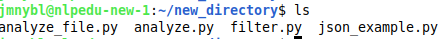



2) Open `analyze_file.py` with less/nano to see how it refers to the input. Run the script.

In [ ]:
python3 analyze_file.py

3) Open `analyze.py` with less/nano to see how it refers to the input. Run the script. Use /home/jmnybl/python-lecture/data.conllu as input.

In [ ]:
cat /home/jmnybl/python-lecture/data.conllu | python3 analyze.py

# ..or alternatively
cp /home/jmnybl/python-lecture/data.conllu .
cat data.conllu | python3 analyze.py

4) Open `filter.py` with less/nano to see how it refers to the input/output. Run the script, it keeps only sentences with subject – “tarvita” – object structure. Use /home/jmnybl/python-lecture/data.conllu as input. Combine `filter.py` with relevant bash commands (e.g. `egrep`) to figure out what is the most common object lemma (“obj” relation) before and after filtering?

--> Note that in (4) it's okay to count all objects of the filtered sentences, not just objects of the verb "tarvita". (If you would like to do that, simplest would be to do it in python since bash commands do not easily suppport that).

In [ ]:
# assumes we copied the data file to new_directory , otherwise path must be given!

cat data.conllu | python3 filter.py | egrep '^[0-9]' | cut -f 3,8 | egrep '\sobj' | cut -f 1 | sort | uniq -c | sort -nr | head -10

# same before filtering (take out python3 filter.py, otherwise identical)
cat data.conllu | egrep '^[0-9]' | cut -f 3,8 | egrep '\sobj' | cut -f 1 | sort | uniq -c | sort -nr | head -10

Before filtering:

```
307 se
282 apu
152 mikä
126 tieto
109 joka
108 tämä
87 palvelu
83 työ
65 ohje
57 asia
```

After filtering:

```
21 apu
5 tuki
4 se
2 yrittäjä
2 yhteys
2 työ
2 mikä
2 huomio
1 vuosi
1 valo
```


# Extra exercises

5) Open `json_example.py`, and try to understand what it does. Run the script (it does not expect any input). This creates you a new file called data.json. Open the data.json with less/nano to see how it looks.

In [ ]:
python3 json_example.py

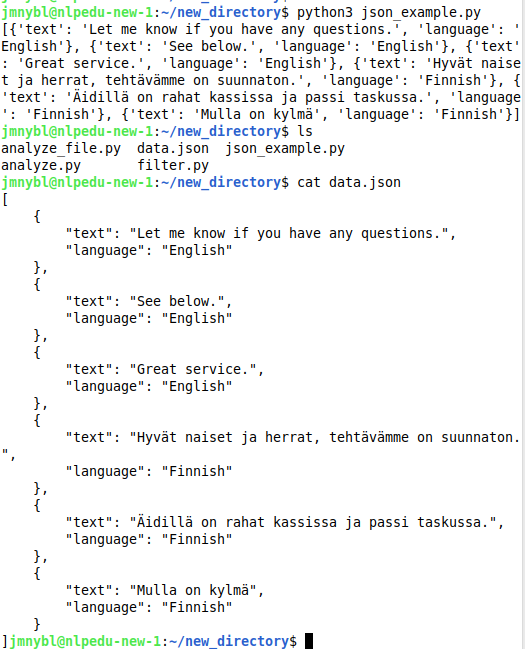






6) If you are familiar with python, try to understand the filtering function in `filter.py`. What kind of filtering functions you could implement yourself?

In [ ]:
# Return True if sentence has subject – "tarvita" (engl. need) – object structure, so if "someone needs something"
# Otherwise return False

def my_filter(sentence):
    root = None # this line is not used, can be deleted!
    for token in sentence: # iterate all tokens to find all cases of lemma = tarvita
        if token[2] == "tarvita": # is this lemma "tarvita"?
            # yes! Does this has both subject and object?
            subj = False # not found yet so False
            obj = False
            for dependent in sentence: # iterate all tokens (again), and check if we can find both subject and object for this "tarvita"
                if dependent[6] == token[0]: # is the head of dependent our "tarvita" token?
                    # yes!
                    if dependent[7] == "nsubj": # is relation nsubj (subject)?
                        subj = True # yes! we have found subject for this
                    if dependent[7] == "obj" or dependent[7] == "dobj": # is relation obj or dobj (object)?
                        obj = True # yes! we have found object for this
            # now we have iterated all dependents of this "tarvita", did we find both subject and object?
            if subj and obj: # this is "subj – tarvita – obj"
                return True # yes! This sentence has at least one "tarvita" with both subject and object, return True
    # if True is not returned at this point, we do not have subject - tarvita - object, return False
    return False

Above is a heavily commented version of the filtering function from `filter.py`, each line explaining what it does. Note that this is not the only option to implement such filtering, often the same thing can be implemented with various different ways.

In principle, if you are able to filter/search based on one line only, possibly piping several different criteria (but each uses information from one line only!), then egrep can be mostly used. If you need information from several lines to decide whether to keep or filter, then python is better option.
  * Example 1: Relation is `obj`: Information from one line only --> egrep
  * Example 2: Relation is `obj`and lemma is `help`: Information from one line only --> egrep
  * Example 3: Relation is `obj` and previous token is `need`: Information from two lines (this and previous line) --> python
  * Example 4: Relation is `obj` and parent token is `need`: Information from two lines (this and parent token line) --> python